<a href="https://colab.research.google.com/github/PrimePy/DataScience/blob/master/Deep%20Learning/Deep%20Learning%20with%20pytorch/PyTorch%20for%20Deep%20Learning%20and%20Computer%20Vision/Intro%20to%20Tensors%20-%20PyTorch/2.LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 import torch
 import numpy as np

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x + b
  return y

In [104]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [105]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [0]:
# Linear Model

In [0]:
from torch.nn import Linear

In [108]:
torch.manual_seed(1) # Generate random value
# One input and one output
model = Linear(in_features=1, out_features=1) 
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [109]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [110]:
x = torch.tensor([[2.0], [3.0]])
print(model(x))

tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


In [0]:
# Custom Modules

In [0]:
import torch.nn as nn

# nn.Module is parent class overall torch model
class CustomLinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred


In [113]:
torch.manual_seed(1)

model = CustomLinearRegression(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [114]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [0]:
# Perform Linear Regression in standard way

In [0]:
# Create dataset

In [0]:
import matplotlib.pyplot as plt

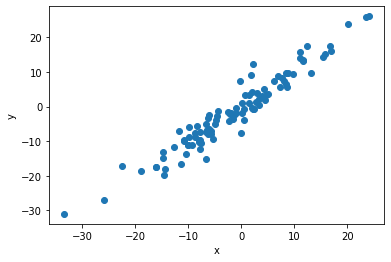

In [118]:
x = torch.randn(100,1) *10
y = x + torch.randn(100,1)*3
plt.plot(x.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
[w,b] = model.parameters()

In [120]:
print(w,b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [0]:
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(x,y)
  plt.show()


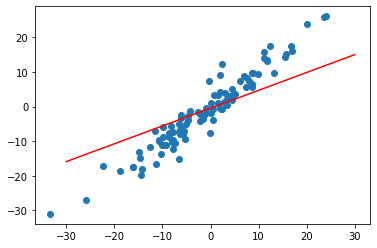

In [123]:
plot_fit('Demo')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [125]:
# Epoch - no.of pass to perform the train process
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  print('epoch :', i, ' Loss : ', loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch : 0  Loss :  36.448333740234375
epoch : 1  Loss :  43.94552230834961
epoch : 2  Loss :  53.461822509765625
epoch : 3  Loss :  65.5404281616211
epoch : 4  Loss :  80.8705062866211
epoch : 5  Loss :  100.32701110839844
epoch : 6  Loss :  125.0198745727539
epoch : 7  Loss :  156.35787963867188
epoch : 8  Loss :  196.1288604736328
epoch : 9  Loss :  246.60162353515625
epoch : 10  Loss :  310.6553955078125
epoch : 11  Loss :  391.9438781738281
epoch : 12  Loss :  495.1044006347656
epoch : 13  Loss :  626.0213623046875
epoch : 14  Loss :  792.162353515625
epoch : 15  Loss :  1003.0047607421875
epoch : 16  Loss :  1270.5738525390625
epoch : 17  Loss :  1610.131591796875
epoch : 18  Loss :  2041.0474853515625
epoch : 19  Loss :  2587.8994140625
epoch : 20  Loss :  3281.8857421875
epoch : 21  Loss :  4162.58251953125
epoch : 22  Loss :  5280.22705078125
epoch : 23  Loss :  6698.5712890625
epoch : 24  Loss :  8498.50390625
epoch : 25  Loss :  10782.72265625
epoch : 26  Loss :  13681.497070

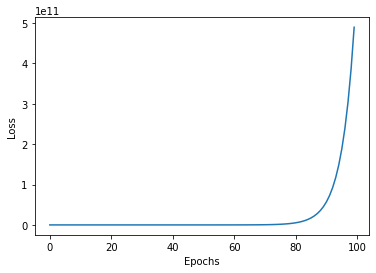

In [126]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()